In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import statistics as st

In [2]:
df = pd.read_excel("dataset/badblood3.xlsx")

# Visualisations

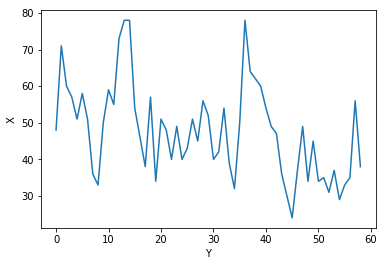

In [28]:
array = [i for i in range(0, 59)]
import matplotlib.pyplot as plt
y=df.loc[:,'bspm']
plt.plot(array,y)
#print(df['Y'])
plt.xlabel("Y")
plt.ylabel('X')
plt.show()

In [4]:
df.columns

Index([          'month',            'bspm',          'Trend1',
                'Trend2',          'Trend3',      'Unnamed: 5',
            'Unnamed: 6',      'Unnamed: 7',      'Unnamed: 8',
       9.402339761808145, 22.21757575757576, 9.345454545454546],
      dtype='object')

In [5]:
length = len(df[["bspm"]])

In [6]:
# st.stdev(df.loc[0:3, "month"])

# Trend1

### Number of bad samples increase between Feb and July
### Pattern is detected
### Exponential weighted moving avg is used along with variance of last 3 months to calc new value

In [7]:
# Trend1
for i in range(3,length-1):
    if(df.loc[i+1, "month"] > 8 or df.loc[i+1, "month"] < 3):
        df.loc[i, "t1"] = (0.6*df.loc[i,"bspm"] + 0.25*df.loc[i-1,"bspm"] + 0.1*df.loc[i-2,"bspm"]) - st.stdev(df.loc[i-3:i,"bspm"])
    else:
        df.loc[i, "t1"] = (0.6*df.loc[i,"bspm"] + 0.25*df.loc[i-1,"bspm"] + 0.1*df.loc[i-2,"bspm"]) + st.stdev(df.loc[i-3:i,"bspm"])

All checked for correct ans

In [10]:
# for i in range(0, 58):
#     print(df.loc[i, "Trend1"], "    ", df.loc[i, "t1"])

### For Jul-Feb previous months val is squared and divided by 80
### For Mar-Jun previous months val is squared and divided by 30
## This is bcs it is observed that values oscillate between 30 - 80

In [11]:
# Trend2
for i in range(3, length-1):
    if(df.loc[i+1, "month"] > 8 or df.loc[i+1, "month"] < 3):
        df.loc[i, "t2"] = (df.loc[i, 'bspm'] ** 2) / 80
    else:
        df.loc[i, "t2"] = (df.loc[i, 'bspm'] ** 2) / 30

All checked for correct answers

In [12]:
# for i in range(0, 58):
#     print(df.loc[i, "Trend2"], "    ", df.loc[i, "t2"])

### TRend3 is the avg of last 2 months

In [13]:
# Trend3
for i in range(3, length-1):
        df.loc[i, "t3"] = (df.loc[i, 'bspm'] + df.loc[i-1, 'bspm']) / 2

All checked for correct answers

In [15]:
# for i in range(0, 58):
#     print(df.loc[i, "Trend3"], "    ", df.loc[i, "t3"])

In [16]:
df.columns

Index([          'month',            'bspm',          'Trend1',
                'Trend2',          'Trend3',      'Unnamed: 5',
            'Unnamed: 6',      'Unnamed: 7',      'Unnamed: 8',
       9.402339761808145, 22.21757575757576, 9.345454545454546,
                    't1',              't2',              't3'],
      dtype='object')

In [21]:
df1 = df.drop(['Trend1', 'Trend2', 'Trend3', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
         'Unnamed: 8'], axis=1)

In [22]:
df1.head()

,month,bspm,9.402339761808145,22.21757575757576,9.345454545454546,t1,t2,t3
0,7,48,NaN,NaN,NaN,NaN,NaN,NaN
1,8,71,NaN,NaN,NaN,NaN,NaN,NaN
2,9,60,NaN,NaN,NaN,NaN,NaN,NaN
3,10,57,NaN,NaN,NaN,46.813167,40.6125,58.5
4,11,51,NaN,NaN,NaN,42.468473,32.5125,54.0


In [23]:
df1.drop(df1.iloc[:, 2:5], inplace = True, axis = 1) 

In [24]:
df1.head()

,month,bspm,t1,t2,t3
0,7,48,NaN,NaN,NaN
1,8,71,NaN,NaN,NaN
2,9,60,NaN,NaN,NaN
3,10,57,46.813167,40.6125,58.5
4,11,51,42.468473,32.5125,54.0


### Mape values for each trend

In [25]:
mapeT1 = np.mean(np.abs((df["t1"] - df["bspm"]) / df["t1"])) * 100
mapeT2 = np.mean(np.abs((df["t2"] - df["bspm"]) / df["t1"])) * 100
mapeT3 = np.mean(np.abs((df["t3"] - df["bspm"]) / df["t1"])) * 100
print(mapeT1)
print(mapeT2)
print(mapeT3)

18.640993475589127
45.91265763632528
10.310092049308277


In [26]:
print((100-mapeT1) )
print((100-mapeT2) )
print((100-mapeT3) )

81.35900652441087
54.08734236367472
89.68990795069172


# Results

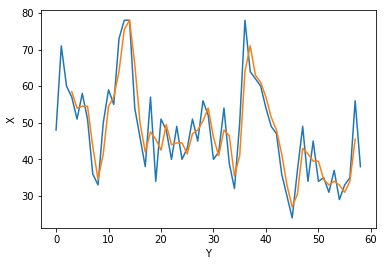

In [29]:
array = [i for i in range(0, 59)]
import matplotlib.pyplot as plt
y=df.loc[:,'bspm']
t3=df.loc[:,'t3']
plt.plot(array,y)
plt.plot(array,t3)
#print(df['Y'])
plt.xlabel("Y")
plt.ylabel('X')
plt.show()